# Lab 13: Clustering
## Sam Bacon - March 30, 2021
### Using the K-means Algorithm for Clustering

In [3]:
# import libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import image as img
from skimage.transform import resize
import pandas as pd

**Image Color Quantization**

In [46]:
# load the image
image_path = 'image.jpg'
image = img.imread(image_path)

if image is None:
    print('********************************************')
    print('*** Unable to load image', image_path)
    print('********************************************\n')

image.shape

(182, 277, 3)

Image loaded ( 182 x 277 )


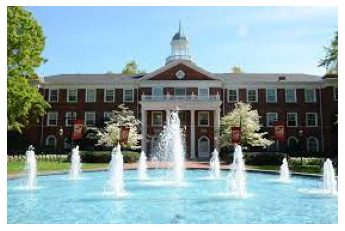

In [47]:
# Resize to make things faster
#image = resize(image, (image.shape[0] // 1.5, image.shape[1] // 1.5),
               # anti_aliasing=True, mode='constant')

# Normalize pixel values between 0 and 1
image = image / image.max()

# height, width, and number of color channels
h, w, ch = image.shape

print('Image loaded (', h, 'x', w, ')')

# show the image
plt.figure()
plt.axis("off")
plt.imshow(image);

In [48]:
# reshape the image to be a list of pixels
# each pixel is a row with 3 columns (R G B)
pixels = image.reshape((h * w, 3))
print('pixels is', pixels.shape)

# First 5 rows
pixels[:5]

pixels is (50414, 3)


array([[0.42745098, 0.49019608, 0.14117647],
       [0.25882353, 0.30980392, 0.        ],
       [0.2       , 0.24705882, 0.        ],
       [0.30980392, 0.34901961, 0.10196078],
       [0.23529412, 0.2745098 , 0.03921569]])

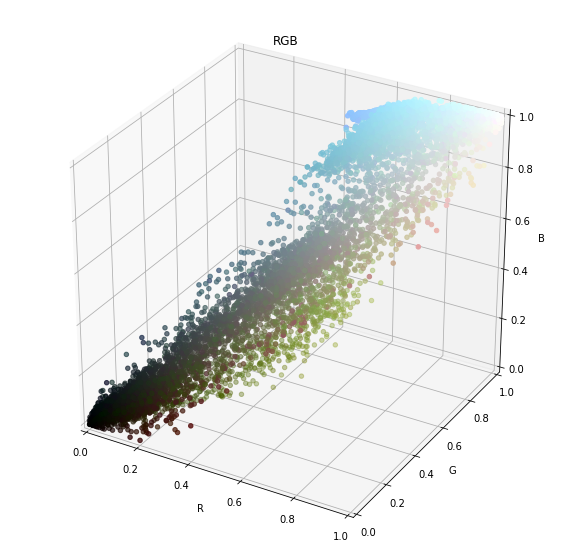

In [49]:
# 3D plot of all the pixels in terms of red, green, and blue
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('RGB')
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
data = pixels
subsample = 5
data = data[::subsample]
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=data)
plt.show()

In [50]:
# cluster the pixel intensities
k = 7
print('Running Kmeans on list of', pixels.shape[0], 'pixels with k =', k, '...')
clt = KMeans(n_clusters=k)
clt.fit(pixels)
print('Kmeans complete')

# Assign each pixel to the closest cluster center
cluster_labels = clt.predict(pixels)

Running Kmeans on list of 50414 pixels with k = 7 ...
Kmeans complete


In [51]:
print('These are the locations of the cluster centers (R G B)')
clt.cluster_centers_

These are the locations of the cluster centers (R G B)


array([[0.62912681, 0.84713052, 0.94221094],
       [0.24374622, 0.25157055, 0.17922885],
       [0.10009808, 0.0910253 , 0.06778429],
       [0.53317284, 0.56121859, 0.50342121],
       [0.81665435, 0.92811183, 0.97294988],
       [0.40332104, 0.43783411, 0.32388365],
       [0.66296074, 0.72709556, 0.70751434]])

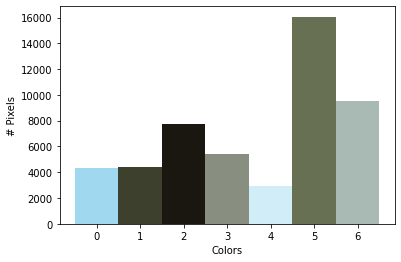

In [52]:
# Get the list of cluster centers
colors = clt.cluster_centers_

# Count how many pixels have been assigned to each cluster label
counts = {}
for label in cluster_labels:
    if not label in counts:
        counts[label] = 1
    else:
        counts[label] += 1

# Show histogram of pixel counts for each cluster
plt.figure()
x = np.arange(k)
plt.bar(x, counts.values(), color=colors, width=1)
plt.xticks(x)
plt.xlabel('Colors')
plt.ylabel('# Pixels')
plt.show()

[[0.40332104 0.43783411 0.32388365]
 [0.24374622 0.25157055 0.17922885]
 [0.24374622 0.25157055 0.17922885]
 [0.24374622 0.25157055 0.17922885]
 [0.24374622 0.25157055 0.17922885]]


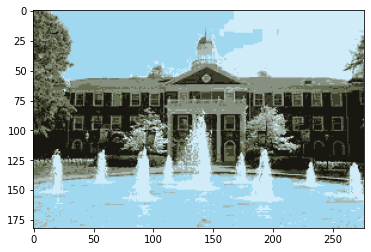

In [53]:
# Assign each pixel to be the color of its closest cluster center
quant = colors[cluster_labels]
print(quant[:5])

# reshape list of RGB values back into an image
img = quant.reshape((h, w, ch))

plt.figure()
plt.imshow(img)
plt.show()

In [54]:
# trying different k values
for i in range(1,20):
  clt = KMeans(n_clusters=k)
  clt.fit(pixels)
  cluster_labels = clt.predict(pixels)

  counts = {}
  for label in cluster_labels:
    if not label in counts:
        counts[label] = 1
    else:
        counts[label] += 1

  quant = colors[cluster_labels]

  img = quant.reshape((h, w, ch))

  print("Number of clusters:", i)
  plt.figure()
  plt.imshow(img)
  plt.show()


Output hidden; open in https://colab.research.google.com to view.

**Ideal "k" value:**

I have identified k = 7 as the ideal value. Honestly, I am not very impressed with any of the k values from 1 - 19, but I believe that 7 would look the best on a T-shirt. It is comparable to some of the higher k values such as 14, but it is significantly "cheaper" because it contains fewer clusters.

**Re-running using different "k values and/or original image size:**

When I re-ran the code using increasing values for k, the runtime of the algorithm increased as well. The increase was not very noticeable because I was only increasing k in increments of 1, but I can imagine how long it would take with k values in the hundreds or thousands. The runtime also increased when I used the original image size instead of the reduced size. This makes sense because a larger image will have more data points for the algorithm to process. The quickest runtimes consisted of small k values and a smaller image size, and the longest runtimes had larger k values and the original image size.

**State Weather**

In [10]:
# read in data
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1eb8ptJBgNsbtXVQ2tRSNt_GhP_4xej6b')
df.head(10)

,state,temp,snowfall
0,AL,46.5,1.6
1,AK,2.6,74.5
2,AZ,43.6,0.3
3,AR,41.5,5.2
4,CA,46.2,0.0
5,CO,25.8,19.1
6,CT,28.5,40.5
7,DE,36.1,20.2
8,FL,59.4,0.0
9,GA,47.8,0.7


In [24]:
# KMeans model with 2 clusters
clt = KMeans(n_clusters=2)

df2 = df.drop(columns = 'state')

# Fit the model to the data (just temp and snowfall)
clt.fit(df2)
print('Kmeans complete')
# Predict the cluster labels based on the data
cluster_labels = clt.predict(df2)

Kmeans complete


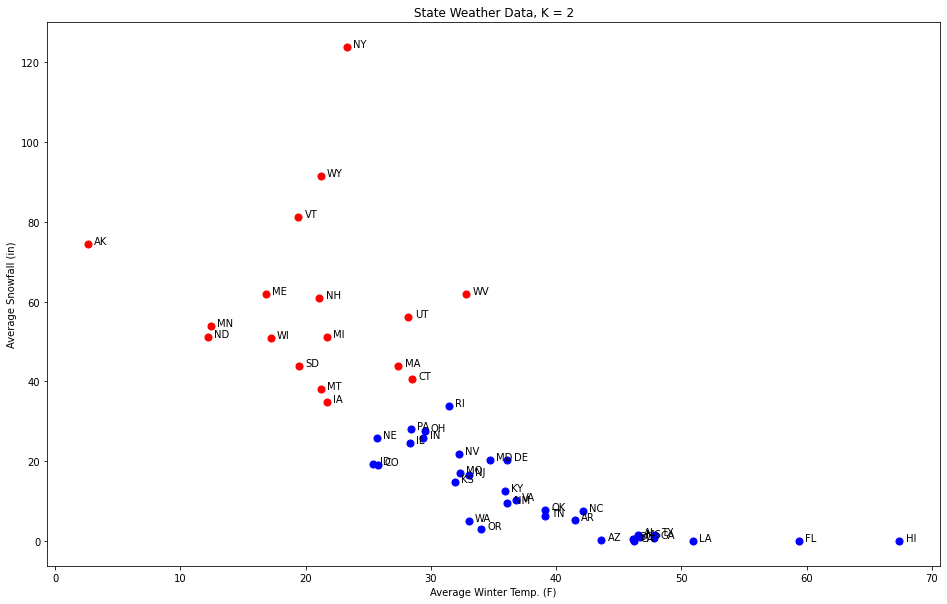

In [25]:
# Visualization
colors =  ['b', 'r', 'g', 'c', 'm', 'y', 'k']
plt.figure(figsize=(16, 10))

# Plot states one at a time
for i, row in df.iterrows():
    # which cluster was this state assigned to?
    # (if you're getting an error here, make sure to create a variable named
    # cluster_labels in the cell above.)
    curr_label = cluster_labels[i]

    # which color should we use for this cluster?
    curr_color = colors[curr_label]

    # Plot this state
    plt.scatter(row['temp'], row['snowfall'], c=curr_color, s=50)

    # Add a text label for this state's name
    plt.text(row['temp']+0.5, row['snowfall'], row['state'], size=10)

plt.title('State Weather Data, K = 2')
plt.xlabel('Average Winter Temp. (F)')
plt.ylabel('Average Snowfall (in)')
plt.show()

In [41]:
# KMeans model with 3 clusters
clt = KMeans(n_clusters=3)

# Fit the model to the data (just temp and snowfall)
clt.fit(df2)
print('Kmeans complete')
# Predict the cluster labels based on the data
cluster_labels = clt.predict(df2)

Kmeans complete


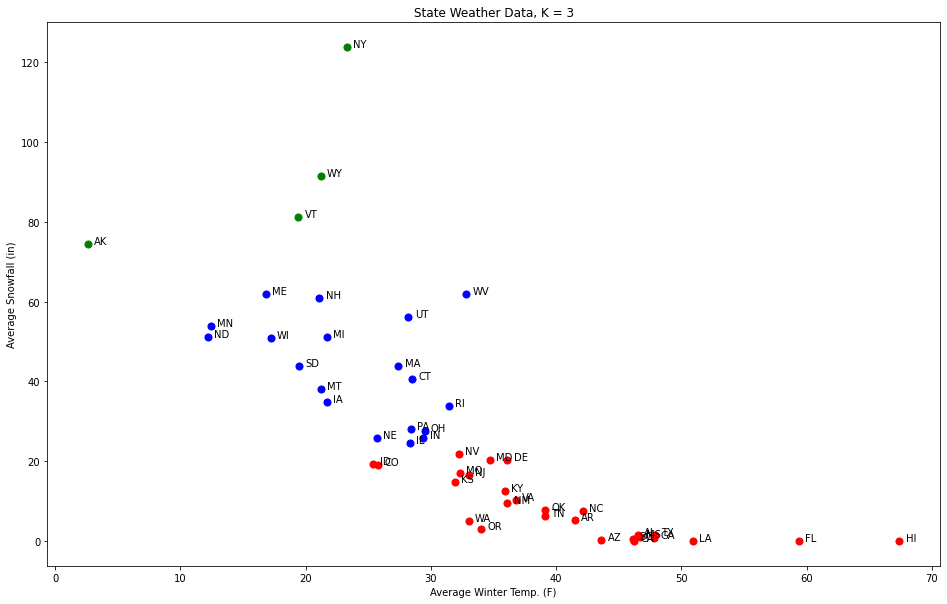

In [42]:
# Visualization
colors =  ['b', 'r', 'g', 'c', 'm', 'y', 'k']
plt.figure(figsize=(16, 10))

# Plot states one at a time
for i, row in df.iterrows():
    # which cluster was this state assigned to?
    # (if you're getting an error here, make sure to create a variable named
    # cluster_labels in the cell above.)
    curr_label = cluster_labels[i]

    # which color should we use for this cluster?
    curr_color = colors[curr_label]

    # Plot this state
    plt.scatter(row['temp'], row['snowfall'], c=curr_color, s=50)

    # Add a text label for this state's name
    plt.text(row['temp']+0.5, row['snowfall'], row['state'], size=10)

plt.title('State Weather Data, K = 3')
plt.xlabel('Average Winter Temp. (F)')
plt.ylabel('Average Snowfall (in)')
plt.show()

In [43]:
# KMeans model with 4 clusters
clt = KMeans(n_clusters=4)

# Fit the model to the data (just temp and snowfall)
clt.fit(df2)
print('Kmeans complete')
# Predict the cluster labels based on the data
cluster_labels = clt.predict(df2)

Kmeans complete


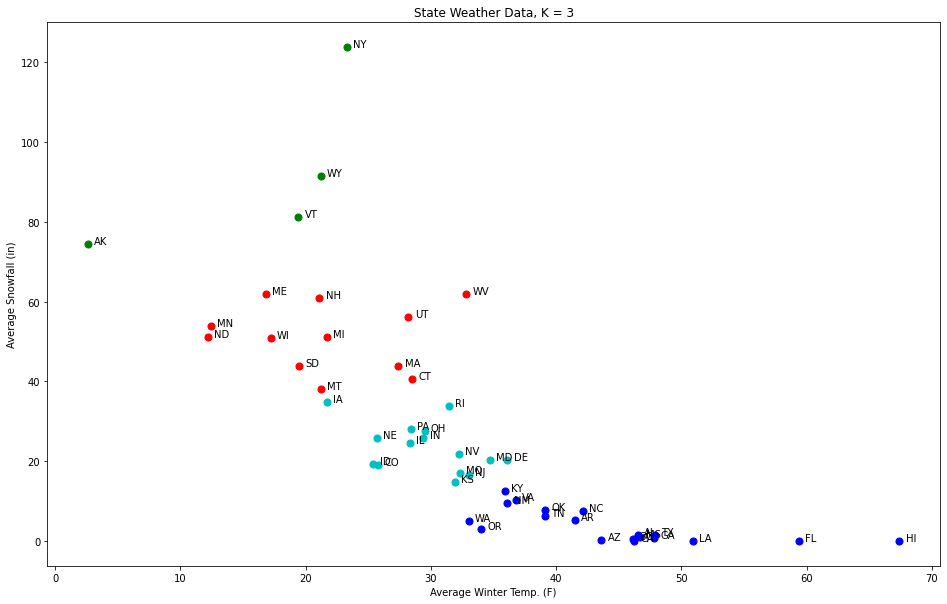

In [39]:
# Visualization
colors =  ['b', 'r', 'g', 'c', 'm', 'y', 'k']
plt.figure(figsize=(16, 10))

# Plot states one at a time
for i, row in df.iterrows():
    # which cluster was this state assigned to?
    # (if you're getting an error here, make sure to create a variable named
    # cluster_labels in the cell above.)
    curr_label = cluster_labels[i]

    # which color should we use for this cluster?
    curr_color = colors[curr_label]

    # Plot this state
    plt.scatter(row['temp'], row['snowfall'], c=curr_color, s=50)

    # Add a text label for this state's name
    plt.text(row['temp']+0.5, row['snowfall'], row['state'], size=10)

plt.title('State Weather Data, K = 3')
plt.xlabel('Average Winter Temp. (F)')
plt.ylabel('Average Snowfall (in)')
plt.show()

**Observations:**

For my ad campaign, I have decided to focus on four targeted marketing campaigns (shown in the scatterplot above). The first market, indicated by the dark green points, is the "heavy snow" line, which is designed for the cluster of states who experience the most snowfall annually. The middle group of red clusters experiences a moderate amount of snow and some pretty cold temperatures, so they will receive "moderate-snow" advertising. The teal group gets less snow but still has some pretty cold temperatures, so they fall into the "cold-weather" marketing campaign. Finally, the dark blue group will receive the "warm-winter" advertisements.

Four clusters seemed like an effective balance because it divides the states into enough clusters that the clothing lines can be specific without becoming too costly.

**Accounting for Geographic Location:**

I would recommend introducing another attribute into the dataset that identifies the "region" of each state (example: Northeast, South, Midwest, East Coast, West Coast). Therefore, when we are training and fitting the KMeans model to identify clusters, the location of the state will also be factored into the clustering process.